In [1]:
#to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing all the important libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\B.K Goel\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
#reading necessary files
names = pd.read_table('mimic_synthetic_feat.name',sep='\n',header=None)
data = pd.read_table('mimic_synthetic_train.data',sep=' ',header=None)
died = pd.read_table('mimic_synthetic_train.solution',sep='\n',header=None)
test = pd.read_table('mimic_synthetic_test.data' ,sep=' ' ,header=None)

In [4]:
name_col = names[0].tolist() #converting the name row of excel to a list

In [5]:
data.drop(0,axis=1,inplace=True) 
test.drop(0,axis=1,inplace=True)
data.columns = name_col       #assigning column names
test.columns =name_col

In [ ]:
null_counts = test.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

In [6]:
data["MARITAL_STATUS"].fillna("MARRIED", inplace = True) 
data["ICU"].fillna("MICU", inplace = True) 
data["LANGUAGE"].fillna("ENGL", inplace = True)
test["LANGUAGE"].fillna("ENGL",inplace = True)

In [ ]:
#columns headings to a different lists acc to their datatypes
num_cols = []
cat_col = []

for cols in data.columns:
    if data[cols].dtype == object:
        cat_col.append(cols)
    else:
        num_cols.append(cols)

In [8]:
#columns headings to a different lists acc to their datatypes
tnum_cols = []
tcat_col = []

for cols in test.columns:
    if test[cols].dtype == object:
        tcat_col.append(cols)
    else:
        tnum_cols.append(cols)

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data[num_cols] = imputer.fit_transform(data[num_cols])


In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
test[tnum_cols] = imputer.fit_transform(test[tnum_cols])

In [11]:
data.drop(['SUBJECT_ID', 'HADM_ID','ADMITTIME','DISCHTIME', 'LANGUAGE', 'RELIGION'], axis=1, inplace=True)
test.drop(['SUBJECT_ID', 'HADM_ID','ADMITTIME','DISCHTIME', 'LANGUAGE', 'RELIGION'], axis=1, inplace=True)

In [ ]:
for name_col in data.columns:
    if data[name_col].dtypes == float:
        unique_cat = len(data[name_col].unique())
        print("Feature '{name_col}' has {unique_cat}' unqiue categories".format(
             name_col = name_col,unique_cat = unique_cat))

In [ ]:
for name_col in data.columns:
    if data[name_col].dtypes == 'object':
        unique_cat = len(data[name_col].unique())
        print("Feature '{name_col}' has {unique_cat}' unqiue categories".format(
             name_col = name_col,unique_cat = unique_cat))

In [ ]:
for name_col in test.columns:
    if data[name_col].dtypes == 'object':
        unique_cat = len(test[name_col].unique())
        print("Feature '{name_col}' has {unique_cat}' unqiue categories".format(
             name_col = name_col,unique_cat = unique_cat))

In [12]:
data["ETHNICITY"]= data["ETHNICITY"].replace("UNKNOWN/NOT_SPECIFIED", "OTHER")
data["ETHNICITY"]= data["ETHNICITY"].replace("UNABLE_TO_OBTAIN", "OTHER")
data["ETHNICITY"]= data["ETHNICITY"].replace("PATIENT_DECLINED_TO_ANSWER", "OTHER")
data["ETHNICITY"]= data["ETHNICITY"].replace("AMERICAN_INDIAN/ALASKA_NATIVE_FEDERALLY_RECOGNIZED_TRIBE", "OTHER")
data["ETHNICITY"]= data["ETHNICITY"].replace("HISPANIC/LATINO_-_HONDURAN", "OTHER")
test["ETHNICITY"]= test["ETHNICITY"].replace("UNKNOWN/NOT_SPECIFIED", "OTHER")
test["ETHNICITY"]= test["ETHNICITY"].replace("UNABLE_TO_OBTAIN", "OTHER")
test["ETHNICITY"]= test["ETHNICITY"].replace("PATIENT_DECLINED_TO_ANSWER", "OTHER")






In [13]:
imp_ft = []
for name_col in data.columns:
    if data[name_col].dtypes == float:
        unique_cat = len(data[name_col].unique())
        if(unique_cat>1):
            imp_ft.append(name_col)

In [14]:
for name_col in data.columns:
    if data[name_col].dtypes == 'object':
        imp_ft.append(name_col)

In [15]:
len(imp_ft)

162

In [16]:
fdata=data[imp_ft]

In [17]:
ftest=test[imp_ft]

In [20]:
Gender_mapping={'M':0,'F':1}                       # convert string to numeric
fdata['GENDER']=fdata['GENDER'].map(Gender_mapping)
ftest['GENDER']=ftest['GENDER'].map(Gender_mapping)


In [21]:
fdata = pd.get_dummies(fdata)

In [22]:
ftest = pd.get_dummies(fdata)

In [23]:
from sklearn import preprocessing

x = fdata.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
fdata = pd.DataFrame(x_scaled)

x = ftest.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ftest = pd.DataFrame(x_scaled)

In [24]:
died.columns = ['DIED']
fdata = pd.concat([fdata,died],axis=1)

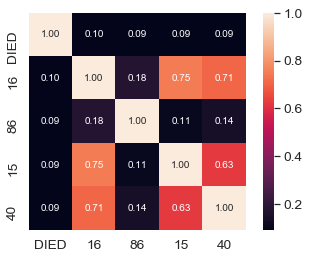

In [25]:
#correlation matrix for numeric data
import seaborn as sns
corrmat = fdata.corr()
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, "DIED")["DIED"].index
cm = np.corrcoef(fdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# The following plot shows that the correlation values with the dependent variable is too low

In [26]:
## Correlation with dependent variable - First filter
corr_with_DIED = fdata.corr()["DIED"].copy()
corr_with_DIED_abs = abs(corr_with_DIED).copy()  # Getting absolute of correlation values
corr_with_DIED_abs = corr_with_DIED_abs.sort_values(ascending = False) # Setting them in descending order
important_vars = [corr_with_DIED_abs.index[0]]
correlation_target_table = pd.DataFrame({'attribute':corr_with_DIED_abs.index, 'list':corr_with_DIED_abs.values})

# Selecting variables with >= 0.01 correlation with target variable 
correlation_target_selected_table = correlation_target_table[(correlation_target_table['list'] >= 0.01)]
important_variables = correlation_target_selected_table['attribute']
len(important_variables)

87

In [28]:
important_variables.drop([0],inplace=True)   #dropping DIED temporarily

In [29]:
imp_ft=important_variables.tolist()

In [30]:
# Drops the non-important variables
fdata = fdata[imp_ft]
ftest = ftest[imp_ft]

In [ ]:
died.columns = ['DIED']
fdata = pd.concat([fdata,died],axis=1)

In [43]:
X = fdata.iloc[:,:-1]         #Train data without output class
Y = fdata.iloc[:,-1:]         #solution of train data

In [46]:
from sklearn.model_selection import train_test_split            #Split data into train & test data 
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.20, random_state = 100)

In [47]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

C:\Users\B.K Goel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train_res, y_train_res)

y_pred = decisiontree.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

88.38


In [71]:
ty_pred = decisiontree.predict(ftest)

In [72]:
c = 0
for i in ty_pred:
    if i == 1:
        c+=1

In [73]:
c

3755

In [ ]:
ty_pred = pd.DataFrame(ty_pred)

In [ ]:
ty_pred.to_csv("dectree.csv")